In [1]:
#config.ipynb contains all the import
%run ../global_class/config.ipynb
#it's the multipolygone of Shanghai
%run ../global_class/getShanghai.ipynb

In [2]:
gdf_taxi = pd.read_pickle('../pickles/utseus-shanghai-taxi-speed-position.pk')

In [3]:
type(gdf_taxi)

geopandas.geodataframe.GeoDataFrame

In [4]:
gdf_taxi.head()

,taxi_id,time,status,lon,lat,speed,geometry
0,24029,2015-04-11,0,121.421822,31.212080,19.6,POINT (121.4265311273298 31.2102277773033)
1,24029,2015-04-11,0,121.423275,31.212148,15.8,POINT (121.4279823397575 31.21029449657971)
2,24029,2015-04-11,0,121.424295,31.212597,11.5,POINT (121.4290010222642 31.21074273305947)
3,24029,2015-04-11,0,121.426872,31.215222,6.5,POINT (121.4315744665943 31.21336630745432)
4,24029,2015-04-11,0,121.427138,31.215365,6.7,POINT (121.4318400592804 31.21350908242947)


In [5]:
'''
df_taxi_lonlat = pd.DataFrame(gdf_taxi.copy()[['lon','lat']])
df_taxi_lonlat = df_taxi_lonlat.rename(columns={'lon':'longitude','lat':'latitude'})
df_taxi_lonlat.head()
gdf_taxi_geo = gdf_taxi['geometry']
df_taxi_lonlat.to_csv("taxi_lonlat.csv", index=False)
gdf_taxi_geo.to_file("taxi_geo.geojson", driver='GeoJSON') '''
# After plotting the point into mapbox the correct coordinates are the columns "longitude" & "latitude"

'\ndf_taxi_lonlat = pd.DataFrame(gdf_taxi.copy()[[\'lon\',\'lat\']])\ndf_taxi_lonlat = df_taxi_lonlat.rename(columns={\'lon\':\'longitude\',\'lat\':\'latitude\'})\ndf_taxi_lonlat.head()\ngdf_taxi_geo = gdf_taxi[\'geometry\']\ndf_taxi_lonlat.to_csv("taxi_lonlat.csv", index=False)\ngdf_taxi_geo.to_file("taxi_geo.geojson", driver=\'GeoJSON\') '

In [6]:
#df_taxi has no na value
print(len(gdf_taxi))
print(len(gdf_taxi.dropna()))

1528047
1528047


In [7]:
gdf_taxi = gdf_taxi.rename(columns={'lon':'longitude','lat':'latitude'})
gdf_taxi = gdf_taxi.drop(columns=['geometry'])
gdf_taxi = gpd.GeoDataFrame(gdf_taxi, geometry = [Point(x,y) for x,y in zip(gdf_taxi.longitude, gdf_taxi.latitude)])
gdf_taxi.crs = {'init': 'epsg:4326'} #world projection

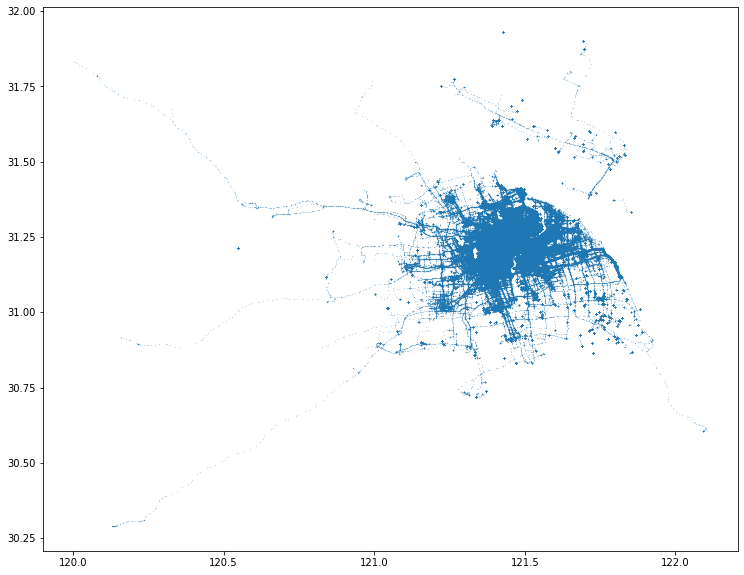

In [8]:
%matplotlib inline
gdf_taxi.plot(markersize=0.01, figsize=(15,10))

In [9]:
time = ManagingTime()
time.displayStartTime()

gdf_taxi = gdf_taxi.loc[gdf_taxi.within(shanghai)]

time.displayRunningTime()

Starting time: 2020-01-05 23:51:36.474884
Running time: 0:13:52.272072


In [10]:
print(len(gdf_taxi))

1526055


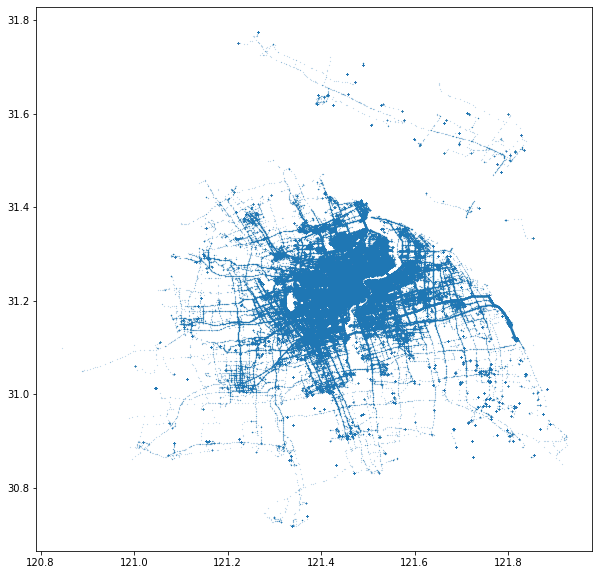

In [11]:
%matplotlib inline
gdf_taxi.plot(markersize=0.01, figsize=(15,10))

In [12]:
#there are duplicated lines in taxi speed dataset but such as time is not precise it's difficult too evaluate
#we suppose that at 5 km/h we should be on an other longitude and latitude
gdf_temp = gdf_taxi[(gdf_taxi.duplicated(keep = 'first', subset=gdf_taxi.columns.difference(['geometry']))) & (gdf_taxi.speed > 5)]
gdf_temp

,taxi_id,time,status,longitude,latitude,speed,geometry
45519,9048,2015-04-11,1,121.412212,31.028275,52.0,POINT (121.412212 31.028275)
174631,25777,2015-04-11,1,121.470672,31.310013,5.5,POINT (121.470672 31.310013)
405825,9041,2015-04-11,1,121.415148,31.019975,6.0,POINT (121.415148 31.019975)
464162,27702,2015-04-11,0,121.431328,31.162030,10.9,POINT (121.431328 31.16203)
670653,9040,2015-04-11,1,121.382293,31.000393,26.0,POINT (121.382293 31.000393)
...,...,...,...,...,...,...,...
1456953,9027,2015-04-11,1,121.386345,31.085497,13.0,POINT (121.386345 31.085497)
1456960,9027,2015-04-11,1,121.386345,31.085497,47.0,POINT (121.386345 31.085497)
1456962,9027,2015-04-11,1,121.386345,31.085497,40.0,POINT (121.386345 31.085497)
1456967,9027,2015-04-11,1,121.386345,31.085497,19.0,POINT (121.386345 31.085497)


In [13]:
gdf_taxi = gdf_taxi.drop(gdf_temp.index)

In [14]:
# What is status ?
print(gdf_taxi.describe())

            taxi_id        status     longitude      latitude         speed
count  1.525986e+06  1.525986e+06  1.525986e+06  1.525986e+06  1.525986e+06
mean   1.905537e+04  4.509766e-01  1.214618e+02  3.122201e+01  1.610586e+01
std    6.341869e+03  4.975911e-01  1.020187e-01  7.529013e-02  2.363219e+01
min    2.000000e+00  0.000000e+00  1.208452e+02  3.071765e+01  0.000000e+00
25%    1.436800e+04  0.000000e+00  1.214046e+02  3.118506e+01  0.000000e+00
50%    1.834100e+04  0.000000e+00  1.214507e+02  3.122360e+01  2.500000e+00
75%    2.536100e+04  1.000000e+00  1.215034e+02  3.126668e+01  2.740000e+01
max    3.005000e+04  1.000000e+00  1.219253e+02  3.177446e+01  9.003000e+03


In [15]:
gdf_taxi[gdf_taxi.speed > 150]

,taxi_id,time,status,longitude,latitude,speed,geometry
138063,14401,2015-04-11,0,121.468772,31.210720,225.4,POINT (121.468772 31.21072)
138064,14401,2015-04-11,0,121.471300,31.211207,175.9,POINT (121.4713 31.211207)
138065,14401,2015-04-11,0,121.477972,31.213377,225.9,POINT (121.477972 31.213377)
138067,14401,2015-04-11,0,121.484057,31.214200,233.3,POINT (121.484057 31.2142)
138070,14401,2015-04-11,0,121.487875,31.217732,191.3,POINT (121.487875 31.217732)
...,...,...,...,...,...,...,...
1522544,10413,2015-04-11,0,121.371917,31.222197,210.9,POINT (121.371917 31.222197)
1522545,10413,2015-04-11,0,121.375003,31.233462,210.9,POINT (121.375003 31.233462)
1522546,10413,2015-04-11,0,121.383100,31.246583,210.9,POINT (121.3831 31.246583)
1522547,10413,2015-04-11,0,121.383905,31.247758,210.9,POINT (121.383905 31.247758)


In [16]:
# Valeur de speed de Taxi pour le '2015-04-11'
print(gdf_taxi.time.min())
print(gdf_taxi.time.max())

2015-04-11
2015-04-11


In [17]:
#df_taxi.taxi_id.hist(bins=24, figsize=(15,10))

In [18]:
gdf_taxi.head()

,taxi_id,time,status,longitude,latitude,speed,geometry
0,24029,2015-04-11,0,121.421822,31.212080,19.6,POINT (121.421822 31.21208)
1,24029,2015-04-11,0,121.423275,31.212148,15.8,POINT (121.423275 31.212148)
2,24029,2015-04-11,0,121.424295,31.212597,11.5,POINT (121.424295 31.212597)
3,24029,2015-04-11,0,121.426872,31.215222,6.5,POINT (121.426872 31.215222)
4,24029,2015-04-11,0,121.427138,31.215365,6.7,POINT (121.427138 31.215365)


In [19]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


gdf_taxi['longitude_m'] = gdf_taxi[['longitude', 'latitude']].apply(getNewLongitude, axis=1)
gdf_taxi['latitude_m'] = gdf_taxi[['longitude', 'latitude']].apply(getNewLatitude, axis=1)

In [20]:
gdf_taxi.head()

,taxi_id,time,status,longitude,latitude,speed,geometry,longitude_m,latitude_m
0,24029,2015-04-11,0,121.421822,31.212080,19.6,POINT (121.421822 31.21208),-2.846406e+06,4.659170e+06
1,24029,2015-04-11,0,121.423275,31.212148,15.8,POINT (121.423275 31.212148),-2.846522e+06,4.659094e+06
2,24029,2015-04-11,0,121.424295,31.212597,11.5,POINT (121.424295 31.212597),-2.846591e+06,4.659022e+06
3,24029,2015-04-11,0,121.426872,31.215222,6.5,POINT (121.426872 31.215222),-2.846722e+06,4.658765e+06
4,24029,2015-04-11,0,121.427138,31.215365,6.7,POINT (121.427138 31.215365),-2.846740e+06,4.658745e+06


In [21]:
gdf_taxi = gdf_taxi[['speed','longitude', 'latitude','longitude_m', 'latitude_m']]

In [22]:
gdf_taxi = gpd.GeoDataFrame(gdf_taxi, geometry = [Point(x,y) for x,y in zip(gdf_taxi.longitude_m, gdf_taxi.latitude_m)])
gdf_taxi.crs = {'init': 'epsg:4479'} #china metric projection

In [23]:
gdf_taxi.to_pickle('../clean_pickles/taxi_speed.pk')

In [24]:
gdf_taxi = pd.read_pickle('../clean_pickles/taxi_speed.pk')

In [25]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [26]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = 'geometry')
#gdf_target.crs = {'init': 'epsg:4479'} #china metric projection

In [ ]:
#need ? to run
time = ManagingTime()
time.displayStartTime()

gdf_target['nb_taxi_all'] = 0
gdf_target['taxi_speed_mean'] = np.nan
for index,value in gdf_target.iterrows():
    clear_output()
    time.displayStartTime()
    print(index)
    gdf_temp = gdf_taxi.loc[gdf_taxi.within(value.surface_buffer)]
    gdf_target.nb_taxi_all.loc[index] = len(gdf_temp)
    gdf_target.taxi_speed_mean.loc[index] = gdf_temp.speed.mean()

gdf_target.to_pickle('../clean_pickles/target_taxi_speed.pk')

time.displayEndTime()
time.displayRunningTime()

In [29]:
gdf_target.describe()

,clean,smell,noise,longitude,latitude,longitude_m,latitude_m,nb_taxi_all,taxi_speed_mean
count,461.000000,395.000000,452.000000,461.000000,461.000000,4.610000e+02,4.610000e+02,461.000000,447.000000
mean,2.557484,0.043038,0.199115,121.443524,31.213527,-2.848112e+06,4.658001e+06,3525.349241,14.961253
std,0.631986,0.203200,0.399777,0.113162,0.129333,9.457475e+03,9.056529e+03,3756.656706,8.488932
min,1.000000,0.000000,0.000000,121.089976,30.736401,-2.893341e+06,4.630866e+06,0.000000,0.000000
25%,2.000000,0.000000,0.000000,121.388639,31.163585,-2.853149e+06,4.652721e+06,541.000000,10.860805
50%,3.000000,0.000000,0.000000,121.448259,31.228257,-2.848240e+06,4.656539e+06,2695.000000,13.696436
75%,3.000000,0.000000,0.000000,121.504818,31.281153,-2.843607e+06,4.661557e+06,5166.000000,18.067211
max,4.000000,1.000000,1.000000,121.892089,31.629071,-2.820830e+06,4.688215e+06,20435.000000,84.557143


In [31]:
# No taxi found in 14 area.
len(gdf_target[gdf_target.nb_taxi_all == 0])

14